In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

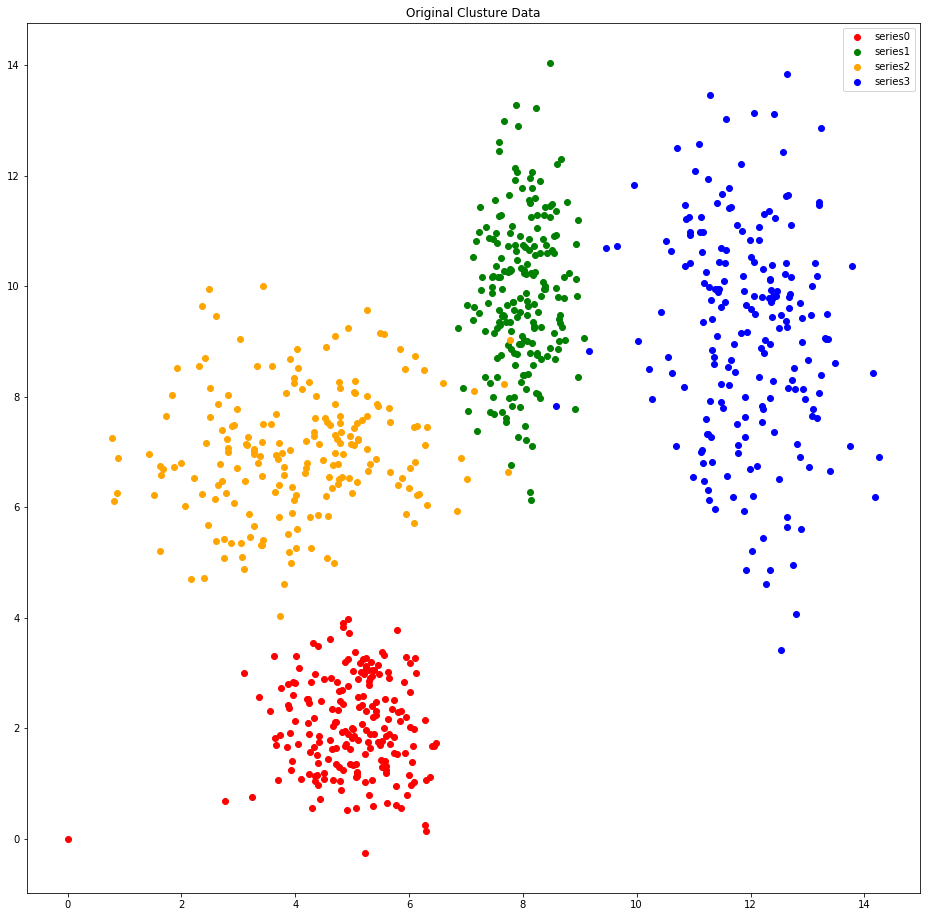

In [2]:
# colors for our plots
colors = ['r', 'g', 'orange', 'b', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# clusture centers
centers = [[5, 2],[8, 10], [4, 7], [12, 9]]
# sigmas [veritcal, horizontal] <- experimental 
# still looking for some info on this
sigmas = [[.7, .9], [.5, 1.4], [1.4, 1.1], [.9, 2]]
# variables
np.random.seed(20)
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

# labled data generation
# pts = hstack(pts, random*sigma + mu)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200)*xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200)*ysigma + ymu))    
    labels = np.hstack((labels, np.ones(200) * i))

# visualization
fig0, ax0 = plt.subplots(figsize=(16,16))
for j in range(4):
    ax0.plot(xpts[labels == j], ypts[labels == j], 'o', color = colors[j], label="series"+str(j))
ax0.set_title('Original Clusture Data')
ax0.legend()

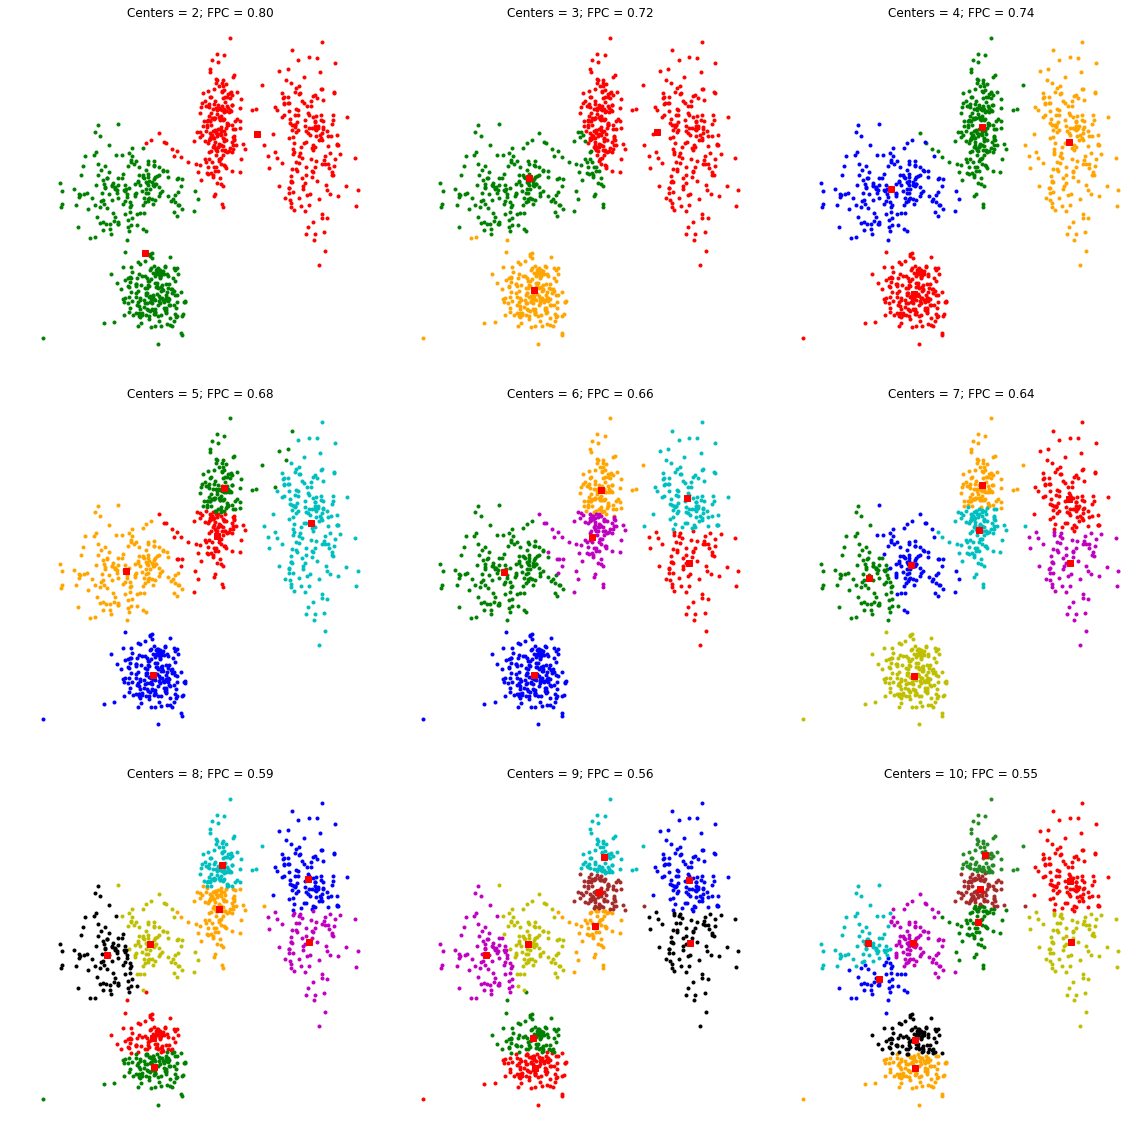

In [3]:
fig1, axes1 = plt.subplots(3, 3, figsize=(16, 16))
alldata = np.vstack((xpts, ypts))
# fuzzy partition coefficient
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    
    fpcs.append(fpc)
    
    clusture_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[clusture_membership == j], ypts[clusture_membership == j], '.', color=colors[j])
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
fig1.tight_layout()

Text(0,0.5,'Fuzzy partition coefficient')

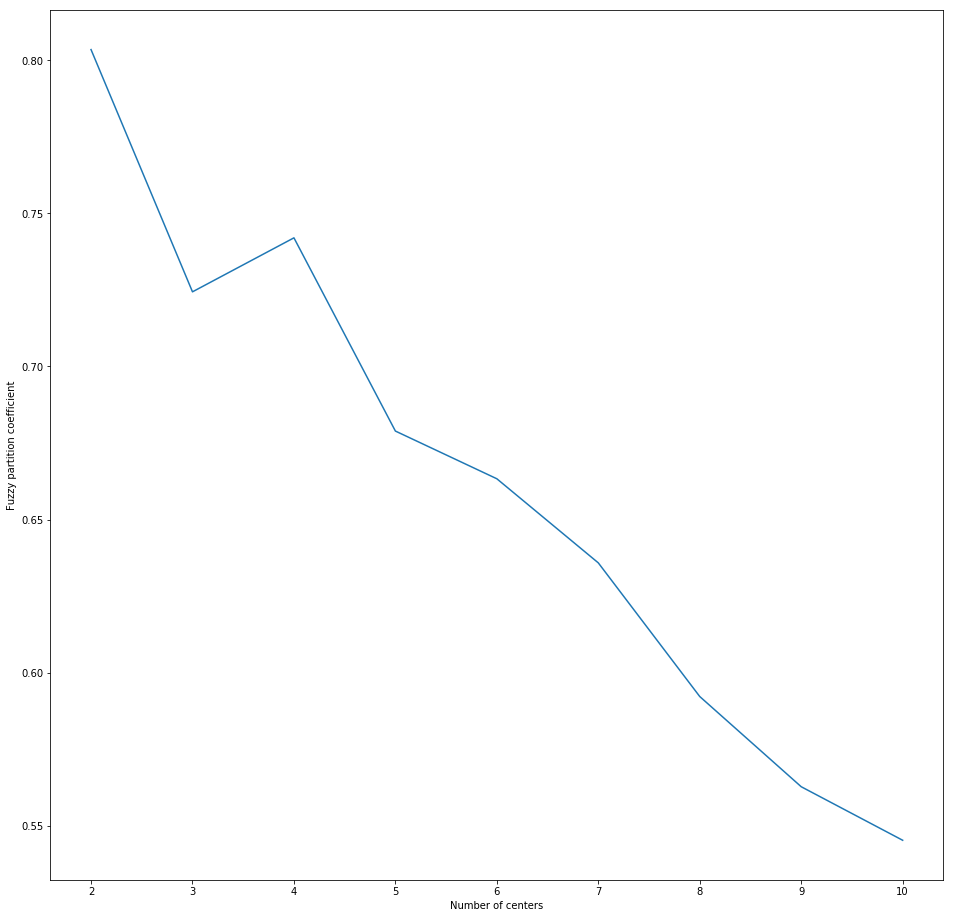

In [4]:
fig2, ax2 = plt.subplots(figsize=(16,16))
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

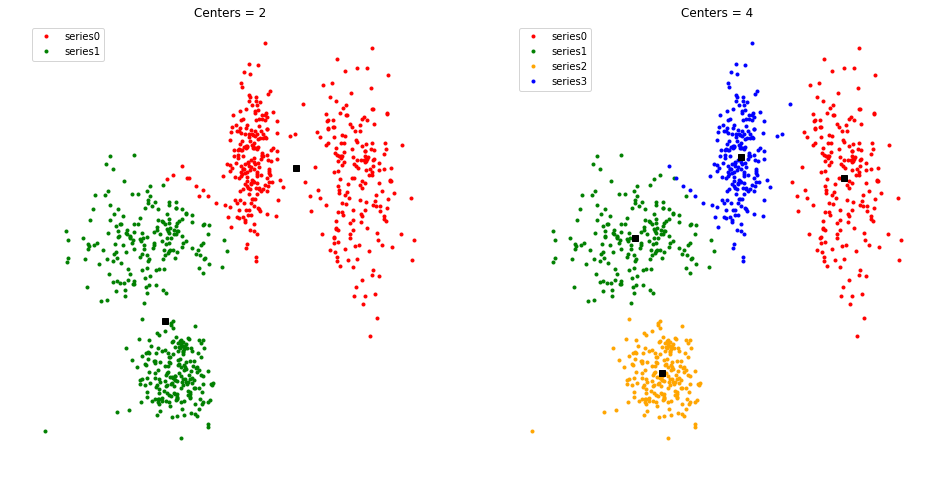

In [5]:
# we have high value for 2 and 4 centers
fig3, ax3 = plt.subplots(1, 2, figsize=(16, 8))
for center, ax in enumerate(ax3.reshape(-1)):
    nctr = 2*center+2
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(alldata, nctr, 2, error=0.005, maxiter=1000, init=None)
    membership = np.argmax(u, axis=0)
    for j in range(nctr):
        ax.plot(xpts[membership==j], ypts[membership==j], '.', color=colors[j], label='series'+str(j))
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'ks')
    ax.set_title('Centers = {0}'.format(nctr))
    ax.axis('off')
    ax.legend()

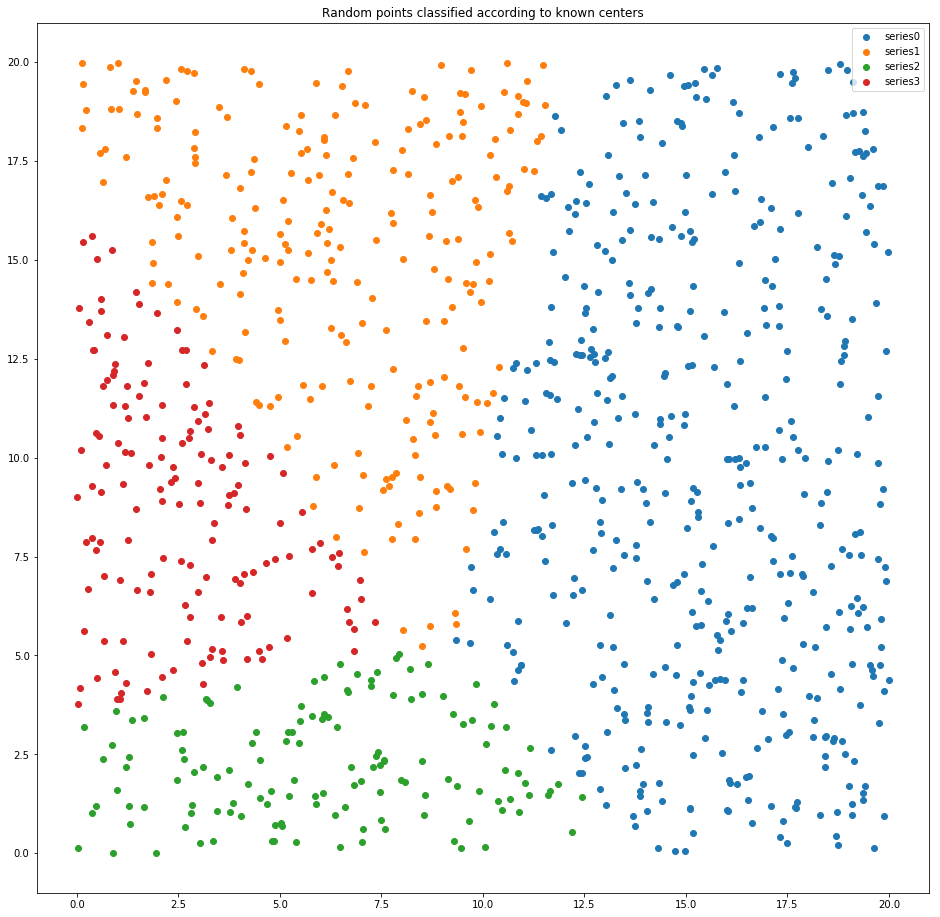

In [6]:
# generating new data
# 4 center data for prediction
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(alldata, nctr, 2, error=0.005, maxiter=1000, init=None)
newdata = np.random.uniform(0, 20, (1000, 2))
u, u0, d, jm, p, fpc = fuzz.cmeans_predict(newdata.T, cntr, 2, error=0.005, maxiter=1000)
membership = np.argmax(u, axis=0)
fig4, ax4 = plt.subplots(figsize=(16,16))
ax4.set_title("Random points classified according to known centers")
for j in range(4):
    ax4.plot(newdata[membership==j,0], newdata[membership==j,1], 'o', label='series'+str(j))
ax4.legend()